In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,SGDClassifier,Perceptron
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,accuracy_score


In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
# le = LabelEncoder()
# train_df['Sex'] = le.fit_transform(train_df['Sex'])
# df

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


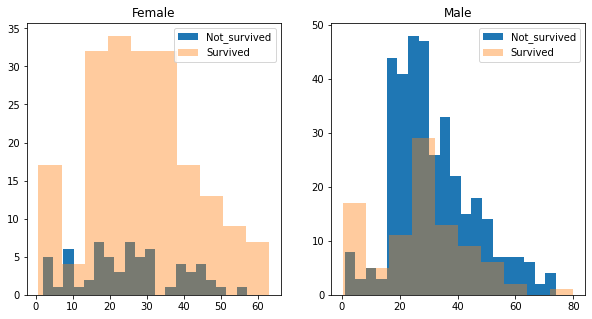

In [8]:
#correlation of Sex , age and Survived

female=train_df[train_df['Sex']=='female']
female.head()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
male=train_df[train_df['Sex']=='male']
plt.title('Female')
plt.hist(female[female['Survived']==0].Age.dropna(),bins=20,label='Not_survived',)
plt.hist(female[female['Survived']==1].Age.dropna(),alpha=.4,label='Survived')
plt.legend()
plt.subplot(1,2,2)
plt.title('Male')
plt.hist(male[male['Survived']==0].Age.dropna(),bins=20,label='Not_survived')
plt.hist(male[male['Survived']==1].Age.dropna(),alpha=.4,label='Survived')
plt.legend()
plt.show()

(array([427.,   0.,   0.,   0.,   0.,  47.,   0.,   0.,   0.,  75.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

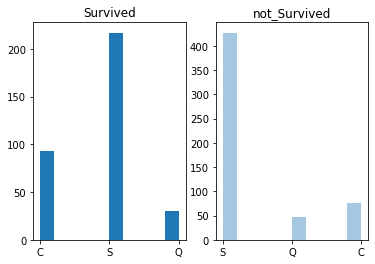

In [9]:
#correlation of emabrkment and survived

plt.subplot(1,2,1)
plt.title('Survived')
plt.hist(train_df[train_df['Survived']==1].Embarked.dropna())
plt.subplot(1,2,2)
plt.title('not_Survived')
plt.hist(train_df[train_df['Survived']==0].Embarked.dropna(),alpha=.4)



C:\Users\ranje\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


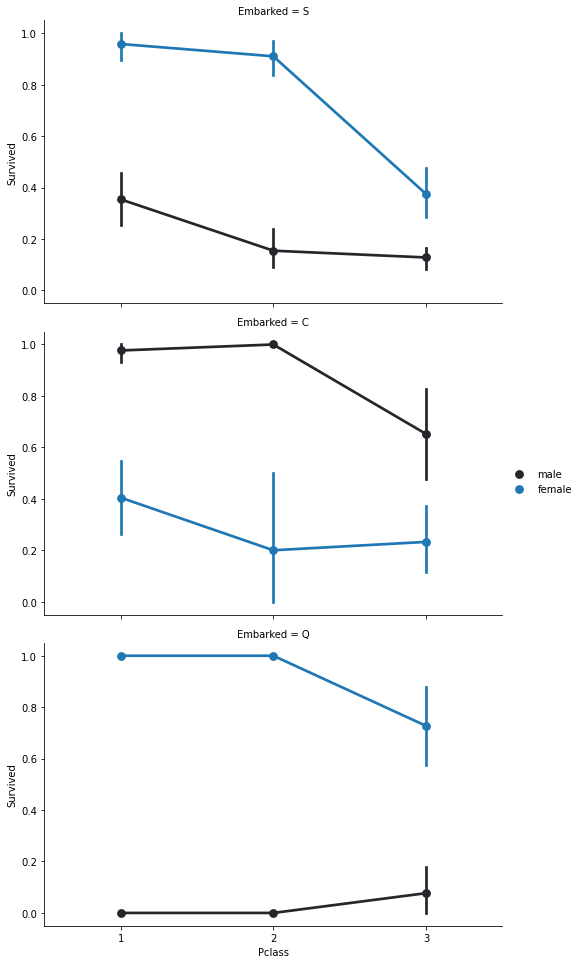

In [10]:
facegrid=sns.FacetGrid(train_df,row='Embarked',size=4.5,aspect=1.6)
facegrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,  order=None, hue_order=None)
facegrid.add_legend()


### Combining SibSp and Parch Coloum

In [11]:
train_df['Relatives']=train_df['SibSp']+train_df['Parch']
update_train=train_df.drop(['SibSp','Parch','Cabin','Ticket','Name'],axis=1)
update_train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S,0
887,888,1,1,female,19.0,30.0000,S,0
888,889,0,3,female,NaN,23.4500,S,3
889,890,1,1,male,26.0,30.0000,C,0


In [12]:
test_df['Relatives']=test_df['SibSp']+test_df['Parch']
update_test=test_df.drop(['SibSp','Parch','Cabin','Ticket','Name'],axis=1)

In [13]:
# filling missing value in Age coloum
def  filmissing(df):
    mean= df['Age'].mean()
    std=df['Age'].std()
    nul_value=df['Age'].isnull().sum()
    age_rand=np.random.randint(mean-std,mean+std,nul_value)
    df_age=df['Age']
    df_age[np.isnan(df_age)]=age_rand
filmissing(update_train)
update_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   Relatives    891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


C:\Users\ranje\AppData\Local\Temp\ipykernel_9660\1192686023.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age[np.isnan(df_age)]=age_rand


In [14]:
# filling  missing value in Embarked colunm 
update_train['Embarked']=update_train['Embarked'].fillna(update_train['Embarked'].mode()[0])
update_test['Embarked'].fillna(update_test['Embarked'].mode()[0],inplace=True)

In [15]:
#filling missing vlue in Fare colunm

update_train['Fare'].fillna(update_train['Fare'].median(),inplace=True)
update_test['Fare'].fillna(update_test['Fare'].mean(),inplace=True)
update_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    object 
 6   Relatives    418 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [16]:
#filling missing value in Age colunm of test df
filmissing(update_test)
update_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    object 
 6   Relatives    418 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


C:\Users\ranje\AppData\Local\Temp\ipykernel_9660\1192686023.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age[np.isnan(df_age)]=age_rand


In [17]:
le=LabelEncoder()
update_train['Sex']=le.fit_transform(update_train['Sex'])
update_test['Sex']=le.fit_transform(update_test['Sex'])
update_train['Fare']=update_train['Fare'].astype(int) # for easy calculation 
update_test['Fare']=update_test['Fare'].astype(int)

update_train['Age']=update_train['Age'].astype(int) # for easy calculation 
update_test['Age']=update_test['Age'].astype(int)

update_train['Embarked']=le.fit_transform(update_train['Embarked'])
update_test['Embarked']=le.fit_transform(update_test['Embarked'])
update_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,1,0,3,1,22,7,2,1
1,2,1,1,0,38,71,0,1
2,3,1,3,0,26,7,2,0
3,4,1,1,0,35,53,2,1
4,5,0,3,1,35,8,2,0
5,6,0,3,1,38,8,1,0
6,7,0,1,1,54,51,2,0
7,8,0,3,1,2,21,2,4
8,9,1,3,0,27,11,2,2
9,10,1,2,0,14,30,0,1


## Preporcessing done


# Making model Now

In [18]:
# x_train=update_train.drop('Survived',axis=1)
# y_train=update_train.Survived
testdata=update_test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(update_train.drop('Survived',axis=1),update_train.Survived,test_size=0.2, random_state=72)

In [20]:
y_test

9      1
450    0
306    1
179    0
346    1
      ..
827    1
755    1
849    1
101    0
801    1
Name: Survived, Length: 179, dtype: int64

In [21]:
def model_predic_accuracy(models,X_train,y_train,X_test,y_test):
    model=models
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    
    return accuracy

In [23]:
classifier=[SGDClassifier(),Perceptron(),KNeighborsClassifier(),
            GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
acuuracies=[]
for i in classifier:
    accu=model_predic_accuracy(i,X_train,y_train,X_test,y_test)
    p=f'{i} = {accu}'
    acuuracies.append(p)
   

In [24]:

acuuracies

['SGDClassifier() = 0.6703910614525139',
 'Perceptron() = 0.7039106145251397',
 'KNeighborsClassifier() = 0.6536312849162011',
 'GaussianNB() = 0.8100558659217877',
 'SVC() = 0.6368715083798883',
 'DecisionTreeClassifier() = 0.7821229050279329',
 'RandomForestClassifier() = 0.8435754189944135']

In [31]:
model_predic_accuracy(RandomForestClassifier(n_estimators=300,criterion='gini',
                                             random_state=70),
                      X_train,y_train,X_test,y_test)

0.8491620111731844

In [28]:
model=RandomForestClassifier(n_estimators=300,criterion='gini',
                                             random_state=70)
model.fit(X_train,y_train)
predicted = model.predict(testdata)

In [33]:
predicted.shape

(418,)

In [27]:
#output=pd.DataFrame({'PassengerID':test_dataset['PassengerId'],'Survived':perdic})

# output.to_csv('submission.csv',index=False)
# print('your submission was successfully saved')